## 1. Introduction 

If we have a biased coin with a probability of landing heads (0) 75% of the time and tails (1) 25% of the time, which of these trials is more likely? 

- 1. 0000000000000000
- 2. 0001010001001100
- 3. 1111111111111111

Based upon the fact that the heads is more likely and tails is a little less likely, we naturally would assume based off intuition that the second choice is most likely, containing a mixture of ones and zeros, with some zeros slightly greater than the ones.  

But shockingly, this is WRONG!

## 2. Theory 

The probabilities for each of the sequences are the following: 

- 1. $(\frac{3}{4})^{16}$

- 2. $(\frac{3}{4})^{12}(\frac{1}{4})^{4}$

- 3. $(\frac{1}{4})^{16}$

Evaluating these, we have: 

In [3]:
print(f'Probability one: {(3/4) ** 16}')
print(f'Probability two: {((3/4) ** 12) * ((1/4) ** 4)}')
print(f'Probability three: {(1/4) ** 16}')

Probability one: 0.010022595757618546
Probability two: 0.00012373575009405613
Probability three: 2.3283064365386963e-10


So we see that the first option is overwhelmingly more likely to happen than the second! How much exactly? 

In [4]:
print(f'How much more likely is P1 than P2? {((3/4) ** 16) / (((3/4) ** 12) * ((1/4) ** 4))}')

How much more likely is P1 than P2? 81.0


So the first outcome is 81x more likely to occur than the second outcome.  

## 3. Intuitive Explanation 

We make an intuitive mistake by considering all possibilities of 12 heads and 4 tails in **any order** as opposed to in a specific sequence.  The probability of getting **any** sequence with 12 heads and 4 tails in any order is much larger than what we calculated.  We essentially just multiply it by its binomial coefficient ${16\choose 4}$, which equals 1820.  So if we were allowed to pick the sequence in **any** order, the second probability would be 1820/81 ~22.5x more likely than the first option.  

## 4. Typical Sets 

The set of all coin tosses with 12 heads and 4 tails is an example of a typical set.  Even though the number of elements in a typical set is generally much smaller than the total number of possible sequences, the probability of a generated sequence being in the typical set is high.  

## 5. Probability Plot 

The surprise in this problem likely results from the subtle difference in the questions we are asking.  When we are allowed to consider **any** arrangement of heads and tails in a sequence, our intuition often leads to jumping to a correct conclusion.  In this problem, however, we care about the specific sequence of the numbers, which leads to the surprise that a series of all heads is more likely than the 12 heads and 4 tails scenario.  Let's plot exactly what this would look like for each combination of heads and tails in 16 tosses: 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb

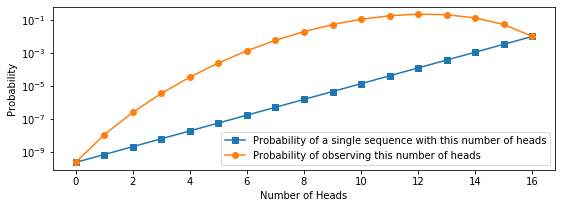

In [6]:
h = np.arange(16 + 1)
p_sequence = (3/4) ** h * (1/4) ** (16 - h)
num_sequences = comb(16, h)
heads_count = p_sequence * num_sequences

plt.figure(figsize=(9, 3))
plt.plot(h, p_sequence, 'C0-s', label = 'Probability of a single sequence with this number of heads')
plt.plot(h, heads_count, 'C1-o', label='Probability of observing this number of heads')
plt.yscale('log')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.legend()